In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('exams.csv')

# Print the first few rows of the dataset
print(data.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86  


In [ ]:
print(data.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('exams.csv')

# Check for missing values
print(data.isnull().sum())

# Separate features and target variable
X = data.drop(columns=['math score', 'reading score', 'writing score'])
y = data[['math score', 'reading score', 'writing score']]

# Define the categorical and numerical columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical_cols = []

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Mean Squared Error: 139.79328350794736


Summary Statistics:
       gender race/ethnicity parental level of education     lunch  \
count    1000           1000                        1000      1000   
unique      2              5                           6         2   
top      male        group C                some college  standard   
freq      508            323                         224       660   
mean      NaN            NaN                         NaN       NaN   
std       NaN            NaN                         NaN       NaN   
min       NaN            NaN                         NaN       NaN   
25%       NaN            NaN                         NaN       NaN   
50%       NaN            NaN                         NaN       NaN   
75%       NaN            NaN                         NaN       NaN   
max       NaN            NaN                         NaN       NaN   

       test preparation course   math score  reading score  writing score  
count                     1000  1000.000000    1000.000000    1

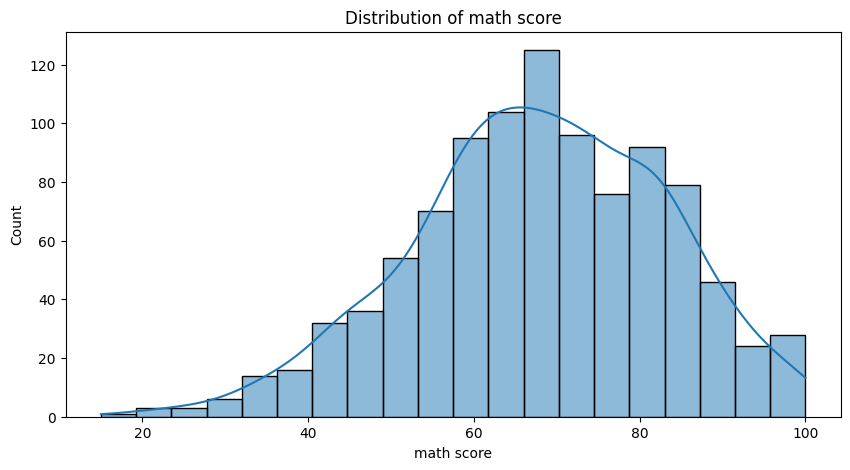

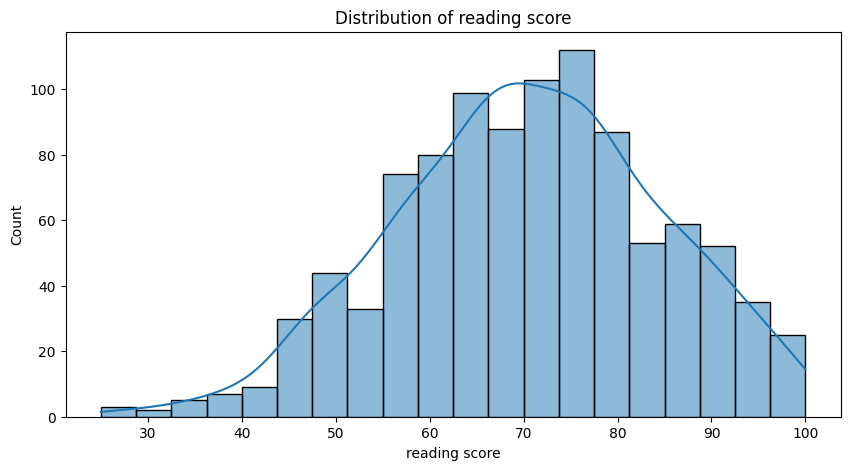

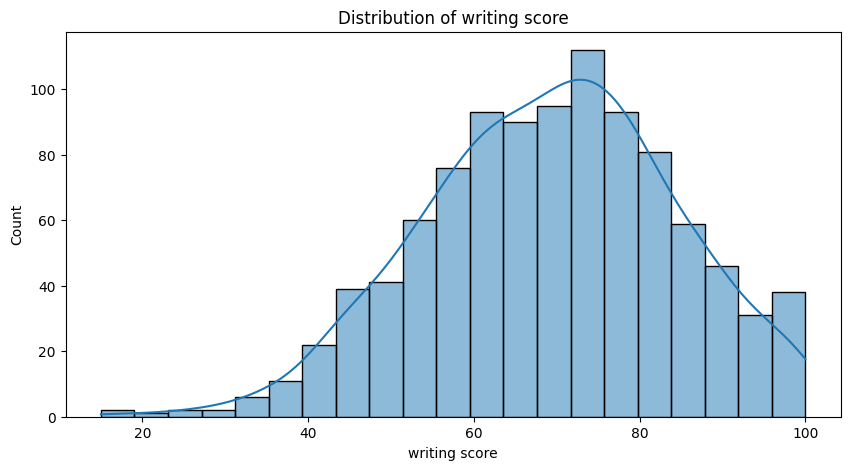

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Summary Statistics
print("Summary Statistics:")
print(data.describe(include='all'))

# Distribution of Numerical Features
numerical_cols = ['math score', 'reading score', 'writing score']
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


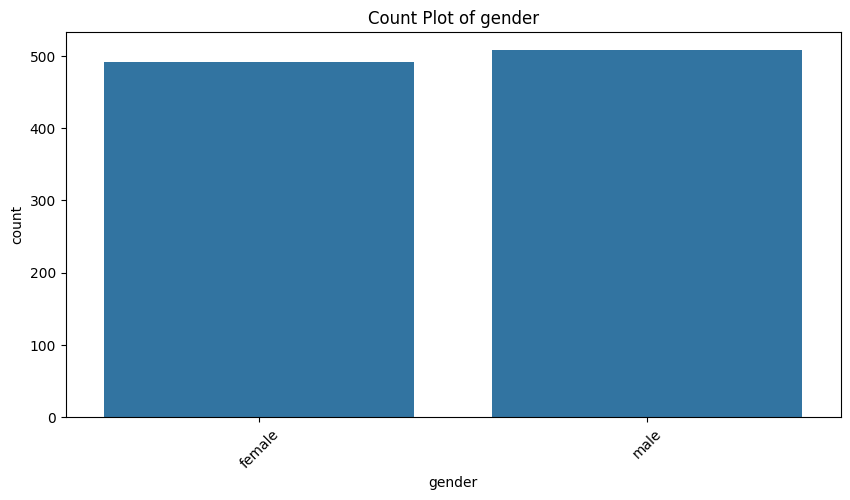

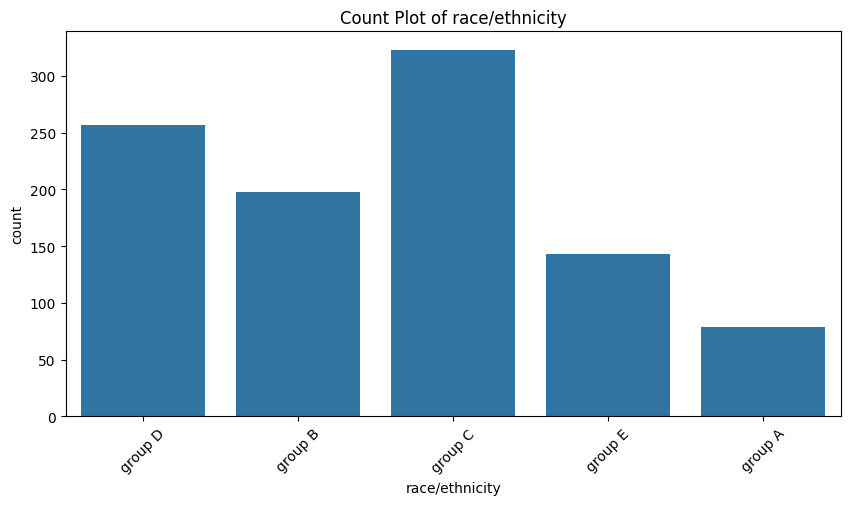

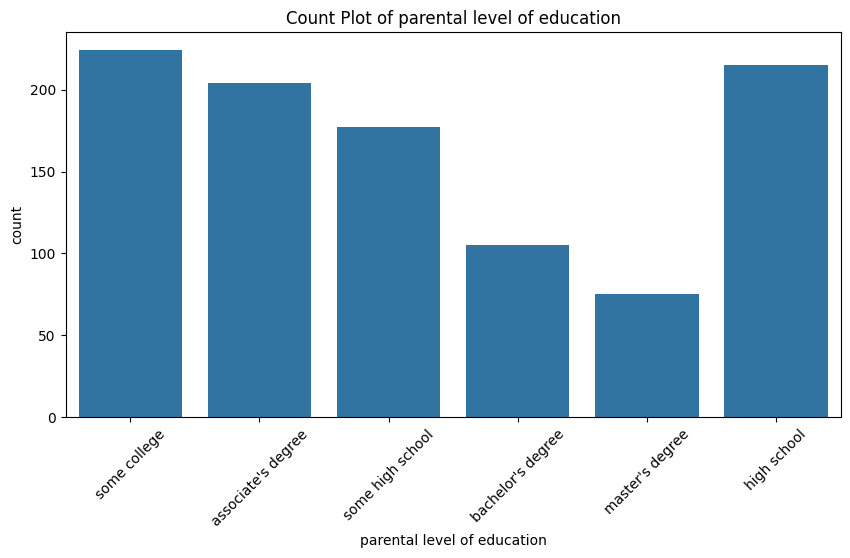

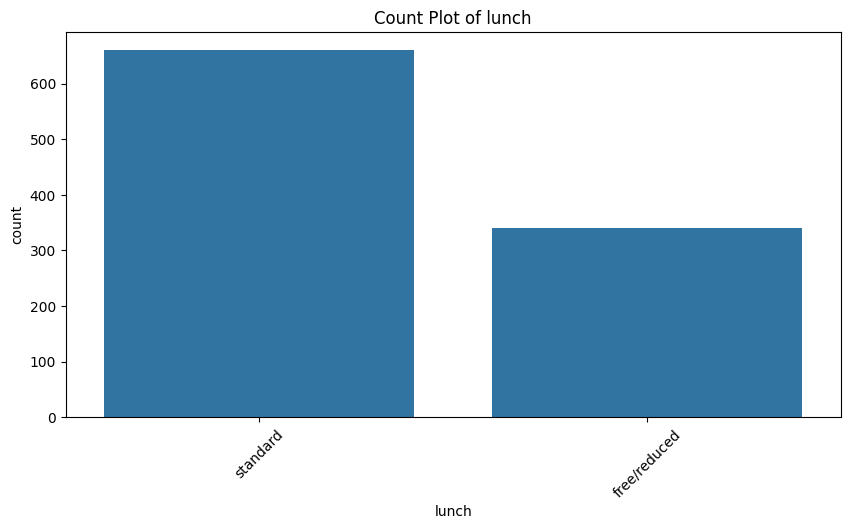

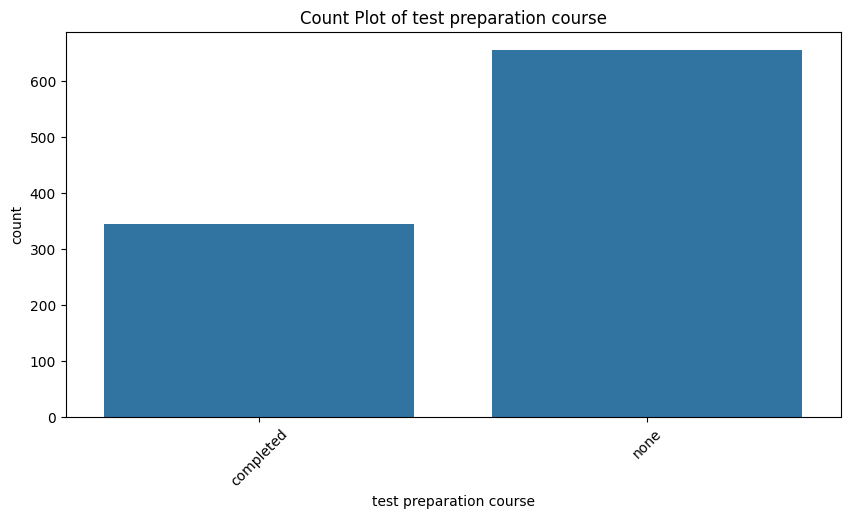

In [ ]:
# Count Plots for Categorical Features
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

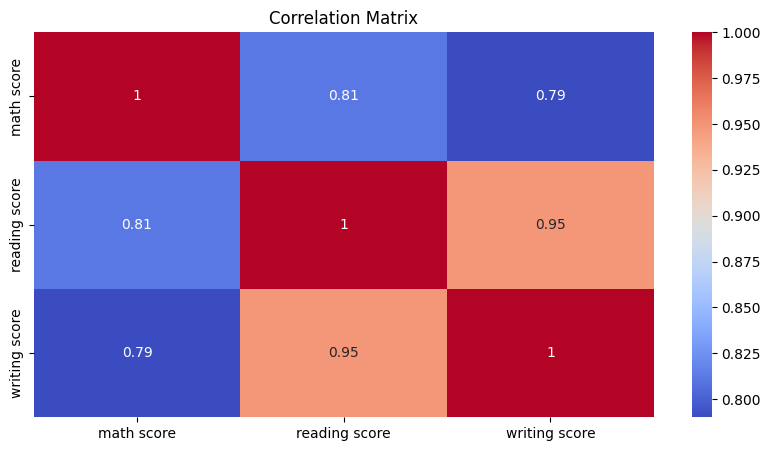

In [ ]:
# Correlation Analysis
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

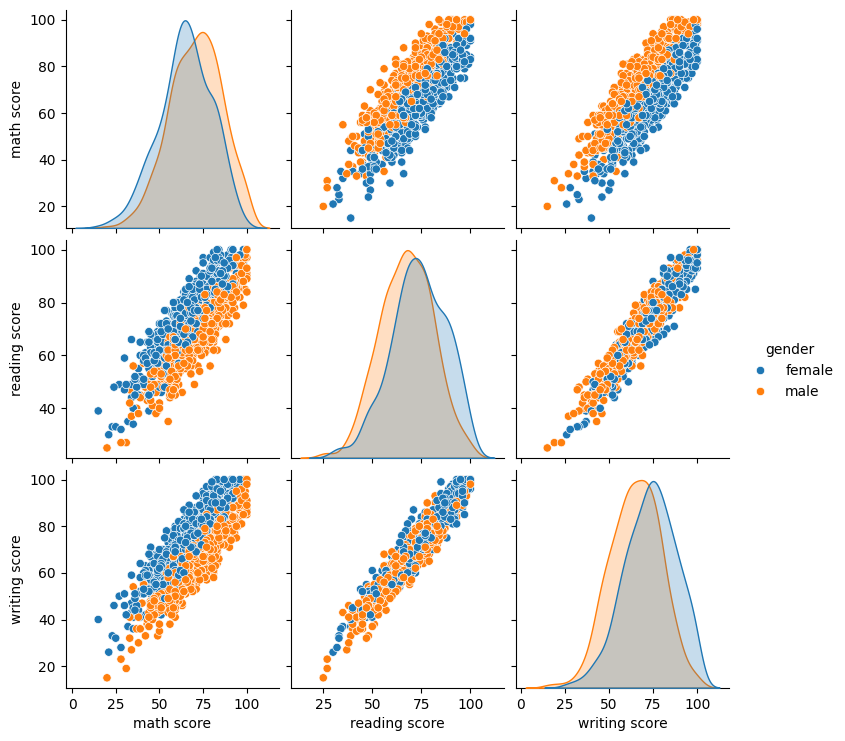

In [ ]:
# Pairplots
sns.pairplot(data, vars=numerical_cols, hue='gender')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop(columns=['math score', 'reading score', 'writing score'])
y = data[['math score', 'reading score', 'writing score']]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Univariate feature selection
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X, y['math score'])  # Example for 'math score'

# Get selected features
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]
print("Selected Features:", selected_feature_names)


Selected Features: Index(['gender_male', 'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop(columns=['math score', 'reading score', 'writing score'])
y = data[['math score', 'reading score', 'writing score']]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Univariate feature selection
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X, y['math score'])  # Example for 'math score'

# Get selected features
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]
print("Selected Features:", selected_feature_names)


Selected Features: Index(['gender_male', 'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Model for feature selection
model = LinearRegression()

# RFE for feature selection
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y['math score'])  # Example for 'math score'

# Get selected features
selected_features_rfe = rfe.get_support(indices=True)
selected_feature_names_rfe = X.columns[selected_features_rfe]
print("Selected Features with RFE:", selected_feature_names_rfe)


Selected Features with RFE: Index(['gender_male', 'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('exams.csv')

# Create a binary target variable (e.g., passing if average score > 60)
data['average_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)
data['pass'] = data['average_score'].apply(lambda x: 1 if x > 60 else 0)

# Separate features and target variable
X = data.drop(columns=['math score', 'reading score', 'writing score', 'average_score', 'pass'])
y = data['pass']

# Define the categorical and numerical columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical_cols = []

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[  6  34]
 [  8 152]]

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.15      0.22        40
           1       0.82      0.95      0.88       160

    accuracy                           0.79       200
   macro avg       0.62      0.55      0.55       200
weighted avg       0.74      0.79      0.75       200


Accuracy Score:
0.79


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.72  0.76  0.78  0.755 0.75 ]
Mean Cross-Validation Accuracy: 0.7529999999999999


In [ ]:
import numpy as np

# Get the feature names and coefficients
feature_names = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
coefficients = model.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df.sort_values(by='Coefficient', ascending=False))


                                           Feature  Coefficient
6                           race/ethnicity_group E     0.794039
14                                  lunch_standard     0.670944
15               test preparation course_completed     0.540464
7   parental level of education_associate's degree     0.327203
8    parental level of education_bachelor's degree     0.270614
0                                    gender_female     0.261644
10     parental level of education_master's degree     0.177789
5                           race/ethnicity_group D     0.054945
11        parental level of education_some college    -0.032546
4                           race/ethnicity_group C    -0.087143
9          parental level of education_high school    -0.115696
1                                      gender_male    -0.261710
3                           race/ethnicity_group B    -0.362636
2                           race/ethnicity_group A    -0.399271
16                    test preparation c

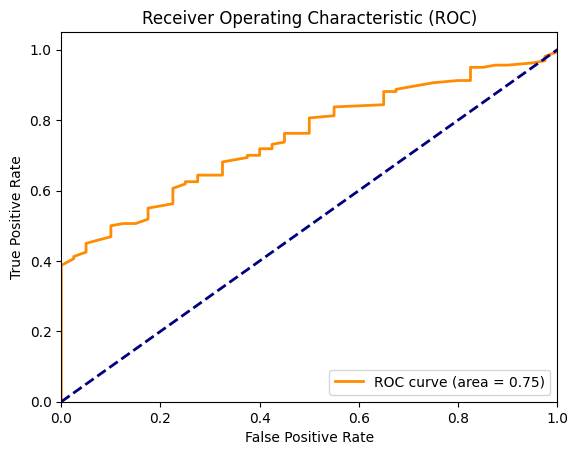

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# Setup the GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2'}
Best Score: 0.73875


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.72  0.76  0.78  0.755 0.75 ]
Mean Cross-Validation Accuracy: 0.7529999999999999


In [ ]:
# Extract feature names and coefficients
feature_names = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
coefficients = model.named_steps['classifier'].coef_[0]

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)


                                           Feature  Coefficient
6                           race/ethnicity_group E     0.794039
14                                  lunch_standard     0.670944
15               test preparation course_completed     0.540464
7   parental level of education_associate's degree     0.327203
8    parental level of education_bachelor's degree     0.270614
0                                    gender_female     0.261644
10     parental level of education_master's degree     0.177789
5                           race/ethnicity_group D     0.054945
11        parental level of education_some college    -0.032546
4                           race/ethnicity_group C    -0.087143
9          parental level of education_high school    -0.115696
1                                      gender_male    -0.261710
3                           race/ethnicity_group B    -0.362636
2                           race/ethnicity_group A    -0.399271
16                    test preparation c

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Define the SMOTE and Logistic Regression pipeline
smote = SMOTE(random_state=42)
model_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression())
])

# Train the model
model_smote.fit(X_train, y_train)

# Evaluate the model
y_pred_smote = model_smote.predict(X_test)
print("Confusion Matrix with SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))


Confusion Matrix with SMOTE:
[[ 24  16]
 [ 54 106]]

Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.31      0.60      0.41        40
           1       0.87      0.66      0.75       160

    accuracy                           0.65       200
   macro avg       0.59      0.63      0.58       200
weighted avg       0.76      0.65      0.68       200



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SMOTE and Logistic Regression
param_grid = {
    'smote__k_neighbors': [3, 5, 7],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# Setup GridSearchCV
smote = SMOTE(random_state=42)
model_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression())
])
grid_search = GridSearchCV(model_smote, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'smote__k_neighbors': 5}
Best Score: 0.6875


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 333, in fit
    self._final_estimator.fit(Xt, yt, **last_step_params["fit"])
  File "/usr/local/lib/p